<a href="https://colab.research.google.com/github/atrinasalsabilnengkoda/rock-paper-scissors/blob/master/Atrina_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-27 02:14:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.19MB/s    in 4m 10s  

2021-04-27 02:18:42 (1.23 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# karena diharuskan untuk membagi dataset maka saya mencoba untuk mengimport data dari local
from google.colab import files
files.upload()

Saving images.zip to images.zip


In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = 'images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_directory = '/tmp/images'
train_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'val')

In [ ]:
os.listdir('/tmp/images/train')

['paper', 'scissors', 'rock']

In [ ]:
os.listdir('/tmp/images/val')

['paper', 'scissors', 'rock']

In [ ]:
# membuat direktori batu pada direktori data training
train_rock_directory = os.path.join(train_directory, 'rock')
 
# membuat direktori kertas pada direktori data training
train_paper_directory = os.path.join(train_directory, 'paper')

# membuat direktori gunting pada direktori data training
train_scissors_directory = os.path.join(train_directory, 'scissors')

# membuat direktori batu pada direktori data validasi
validation_rock_directory = os.path.join(validation_directory, 'rock')
 
# membuat direktori kertas pada direktori data validasi
validation_paper_directory = os.path.join(validation_directory, 'paper')

# membuat direktori gunting pada direktori data validasi
validation_scissors_directory = os.path.join(validation_directory, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_directory,  # direktori data latih
        target_size=(152, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_directory, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(
    train_generator, 
    epochs=25, 
    steps_per_epoch=25, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=3)

Epoch 1/25
25/25 [==============================] - 8s 280ms/step - loss: 0.3100 - accuracy: 0.9679 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 2/25
25/25 [==============================] - 7s 264ms/step - loss: 0.4454 - accuracy: 0.8848 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 3/25
25/25 [==============================] - 7s 266ms/step - loss: 0.2291 - accuracy: 0.9403 - val_loss: 0.8866 - val_accuracy: 0.9167
Epoch 4/25
25/25 [==============================] - 7s 266ms/step - loss: 0.1412 - accuracy: 0.9169 - val_loss: 0.0770 - val_accuracy: 1.0000
Epoch 5/25
25/25 [==============================] - 7s 265ms/step - loss: 0.1178 - accuracy: 0.9646 - val_loss: 0.3460 - val_accuracy: 0.8333
Epoch 6/25
25/25 [==============================] - 7s 268ms/step - loss: 0.1854 - accuracy: 0.9629 - val_loss: 0.3770 - val_accuracy: 0.8333
Epoch 7/25
25/25 [==============================] - 7s 269ms/step - loss: 0.3413 - accuracy: 0.8674 - val_loss: 0.1134 - val_accuracy: 0.9167
Epoch 

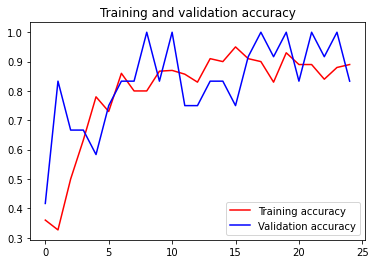

<Figure size 432x288 with 0 Axes>

In [ ]:
#buat grafik akurasi
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving 2O9XPBJRT119drWX.png to 2O9XPBJRT119drWX.png
2O9XPBJRT119drWX.png
[[0. 1. 0.]]
Rock


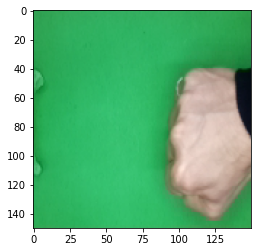

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  pict = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(pict)
  x = image.img_to_array(pict)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

  if classes[0,0]!=0:
    print('Paper')
  elif classes[0,1]!=0:
    print('Rock')
  else :
    print('Scissors')

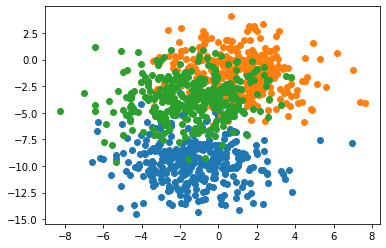

In [ ]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

In [ ]:
print("Nama : Atrina Salsabil Nengkoda")
print("Email : atrina.nengkoda@gmail.com")

Nama : Atrina Salsabil Nengkoda
Email : atrina.nengkoda@gmail.com
